### Tensorflow 正则化实现

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

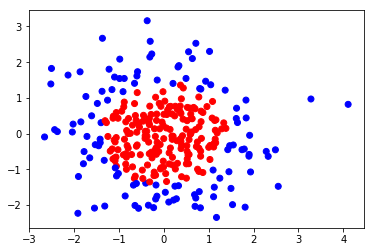

In [14]:
BATCH_SIZE = 30
SEED = 2

rdm = np.random.RandomState(SEED)
X = rdm.randn(300, 2)

Y_ = [int(x0 * x0 + x1 * x1 < 2) for (x0, x1) in X]
Y_c = [["red" if y else "blue"] for y in Y_]

X = np.vstack(X).reshape(-1,2)
Y_ = np.vstack(Y_).reshape(-1,1)

plt.scatter(X[:,0], X[:,1], c=np.squeeze(Y_c))
plt.show()

after 0 steps, loss is: 3.415426
after 2000 steps, loss is: 0.373744
after 4000 steps, loss is: 0.167356
after 6000 steps, loss is: 0.131147
after 8000 steps, loss is: 0.111856
after 10000 steps, loss is: 0.098087
after 12000 steps, loss is: 0.088432
after 14000 steps, loss is: 0.081926
after 16000 steps, loss is: 0.079117
after 18000 steps, loss is: 0.077741
after 20000 steps, loss is: 0.076873
after 22000 steps, loss is: 0.076259
after 24000 steps, loss is: 0.075754
after 26000 steps, loss is: 0.075366
after 28000 steps, loss is: 0.075057
after 30000 steps, loss is: 0.074808
after 32000 steps, loss is: 0.074629
after 34000 steps, loss is: 0.074468
after 36000 steps, loss is: 0.074315
after 38000 steps, loss is: 0.074167
W1:
 [[-0.53167522 -0.06598742 -0.0785019  -0.28312063  0.04331704  1.30097353
  -0.06755686 -0.62350577 -0.03018612 -0.31305882 -0.31465149]
 [ 0.12837988 -1.78172123 -0.38490763 -0.52989352  0.97578138 -1.36487126
  -0.44368029  1.43122661 -1.01868665 -0.34812188  0

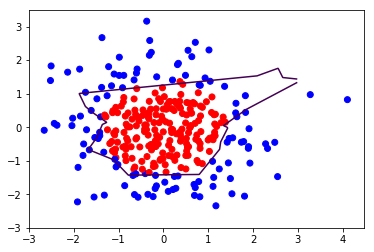

In [15]:
def get_weight(shape, regularizer):
    
    W = tf.Variable(tf.random_normal(shape), dtype=tf.float32)
    tf.add_to_collection("losses", tf.contrib.layers.l2_regularizer(regularizer)(W))
    return W

def get_biases(shape):
    
    b = tf.Variable(tf.constant(0.01, shape=shape))
    return b 

x = tf.placeholder(tf.float32, shape=[None, 2])
y_ = tf.placeholder(tf.float32, shape=[None, 1])

W1 = get_weight([2,11], 0.01)
b1 = get_biases([11])
y1 = tf.nn.relu(tf.matmul(x, W1) + b1)

W2 = get_weight([11, 1], 0.01)
b2 = get_biases([1])
y = tf.matmul(y1, W2) + b2


loss_mse = tf.reduce_mean(tf.square(y - y_))
loss_total = loss_mse + tf.add_n(tf.get_collection("losses"))


train_step = tf.train.AdamOptimizer(0.0001).minimize(loss_mse)

with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    STEPS = 40000
    for i in range(STEPS):
        start = (i * BATCH_SIZE) % 300
        end = start + BATCH_SIZE
        sess.run(train_step, feed_dict={x: X[start:end], y_:Y_[start:end]})
        if i % 2000 ==0:
            loss_mse_v = sess.run(loss_mse, feed_dict={x:X, y_:Y_})
            print("after %d steps, loss is: %f" %(i, loss_mse_v))
    xx, yy = np.mgrid[-3:3:.01, -3:3:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = sess.run(y, feed_dict={x:grid})
    probs = probs.reshape(xx.shape)
    print("W1:\n", sess.run(W1))
    print("b1:\n", sess.run(b1))
    print("W2:\n", sess.run(W2))
    print("b2:\n", sess.run(b2))
    
plt.scatter(X[:,0], X[:,1], c=np.squeeze(Y_c))
plt.contour(xx, yy, probs, levels=[.5])
plt.show()

after 0 steps. loss is:6.894409
after 2000 steps. loss is:1.495605
after 4000 steps. loss is:0.539718
after 6000 steps. loss is:0.347715
after 8000 steps. loss is:0.290328
after 10000 steps. loss is:0.252914
after 12000 steps. loss is:0.224674
after 14000 steps. loss is:0.202272
after 16000 steps. loss is:0.184423
after 18000 steps. loss is:0.170343
after 20000 steps. loss is:0.159323
after 22000 steps. loss is:0.150611
after 24000 steps. loss is:0.143591
after 26000 steps. loss is:0.137640
after 28000 steps. loss is:0.132354
after 30000 steps. loss is:0.128158
after 32000 steps. loss is:0.124673
after 34000 steps. loss is:0.121592
after 36000 steps. loss is:0.118860
after 38000 steps. loss is:0.116364
W1:
 [[ 0.20878845  0.19507849 -0.55639321  0.06525878 -0.43887335  0.93207991
   0.06966899  0.33632272 -0.17879413  0.16149488 -0.23836358]
 [ 0.10131624  0.19604927  0.06677895 -0.12534453 -0.52013898 -0.14263882
   0.04685735  0.20508228  0.34848991  0.14303553  0.5448854 ]]
b1:
 [ 0

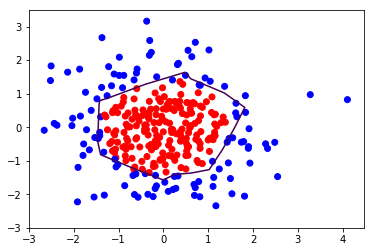

In [18]:
train_step = tf.train.AdamOptimizer(0.0001).minimize(loss_total)

with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    
    STEPS = 40000
    for i in range(STEPS):
        start = (i * BATCH_SIZE) % 300
        end = start + BATCH_SIZE
        sess.run(train_step,feed_dict={x:X[start:end], y_:Y_[start:end]})
        if i % 2000 ==0:
            loss_v = sess.run(loss_total, feed_dict={x:X, y_:Y_})
            print("after %d steps. loss is:%f" %(i, loss_v))
    
    xx, yy = np.mgrid[-3:3:0.01, -3:3:0.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = sess.run(y, feed_dict={x:grid})
    probs = probs.reshape(xx.shape)
    print("W1:\n", sess.run(W1))
    print("b1:\n", sess.run(b1))
    print('W2:\n', sess.run(W2))
    print("b2:\n", sess.run(b2))
    
plt.scatter(X[:,0], X[:,1], c=np.squeeze(Y_c))
plt.contour(xx, yy, probs, levels=[.5])
plt.show()

### 两图对比，实施正则化后，缓解了过拟合。

In [19]:
## generate some random data
import numpy as np
import matplotlib.pyplot as plt
seed = 2

def generateds():
    
    rdm = np.random.RandomState(seed)
    X = rdm.randn(300,2)
    
    Y_ = [int(x0*2 + x1*2 < 2) for (x0, x1) in X]
    Y_c = [["red" if y else "blue"] for y in Y_]
    
    X = np.vstack(X).reshape(-1, 2)
    Y_ = np.vstack(Y_).reshape(-1,1)
    
    return X, Y_, Y_c


In [20]:
import tensorflow as tf

In [22]:
def get_weight(shape, regularizer):
    
    W = tf.Variable(tf.random_normal(shape, dtype=tf.float32))
    tf.add_to_collection("losses", tf.contrib.layers.l1_regularizer(regularizer)(W))
    return W

def get_biases(shape):
    
    b = tf.Variable(tf.constant(0.01, shape=shape))
    return b

def forward(x, regularizer):
    
    W1 = get_weight([2,11], regularizer)
    b1 = get_biases([11])
    y1 = tf.nn.relu(tf.matmul(x, W1) + b1)
    
    W2 = get_weight([11,1], regularizer)
    b2 = get_biases([1])
    y = tf.matmul(y1, W2) + b2   # not throgh activation function
    
    return y

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
STEPS = 40000
BATCH_SIZE = 30
LEARNING_RATE_BASE = 0.001
LEARNING_RATE_DECAY = 0.999
REGULARIZER = 0.01

def backward():
    
    X = tf.placeholder(tf.float32, shape=[None, 2])
    y_ = tf.placeholder(tf.float32, shape=[None, 1])
    
    X, Y_, Y_c = generateds()
    
    y = forward(x, REGULARIZER)
    
    global_step = tf.Variable(0, trainable=False)
    learning_rate = tf.train.exponential_decay(
                        LEARNING_RATE_BASE,
                        global_step,
                        300 / BATCH_SIZE,
                        LEARNING_RATE_DECAY,
                        staircase = True)
    
    # define loss function
    loss_mse = tf.reduce_mean(tf.square(y - y_))
    loss_total = loss_mse + tf.add_n(tf.get_collection("losses"))
    
    
    # define backward spread method including regularization
    train_step = tf.train.AdamOptimizer(learning_rate).minimize(loss_total)
    
    with tf.Session() as sess:
        init_op = tf.global_variables_initializer()
        sess.run(init_op)
        
        for i in range(STEPS):
            start = (i * BATCH_SIZE) % 300
            end = start + BATCH_SIZE
            sess.run(train_step, feed_dict={x:X[start:end], y_:Y_[start:end]})
            if i %2000 ==0:
                loss_v = sess.run(loss_total, feed_dict={x:X, y_:Y_})
                print("after %d steps, loss is: %f" %(i, loss_v))
        
        xx, yy = np.mgrid[-3:3:0.01, -3:3:0.01]
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = sess.run(y, feed_dict={x:grid})
        probs = probs.reshape(xx.shape)
    
    plt.scatter(X[:,0], X[:,1], c=np.squeeze(Y_c))
    plt.contour(xx, yy, probs, levels=[.5])
    plt.show()



after 0 steps, loss is: 22.246252
after 2000 steps, loss is: 0.392584
after 4000 steps, loss is: 0.281925
after 6000 steps, loss is: 0.235115
after 8000 steps, loss is: 0.171345
after 10000 steps, loss is: 0.122044
after 12000 steps, loss is: 0.085663
after 14000 steps, loss is: 0.069618
after 16000 steps, loss is: 0.067476
after 18000 steps, loss is: 0.067475
after 20000 steps, loss is: 0.067476
after 22000 steps, loss is: 0.067476
after 24000 steps, loss is: 0.067473
after 26000 steps, loss is: 0.067482
after 28000 steps, loss is: 0.067477
after 30000 steps, loss is: 0.067471
after 32000 steps, loss is: 0.067470
after 34000 steps, loss is: 0.067470
after 36000 steps, loss is: 0.067471
after 38000 steps, loss is: 0.067473


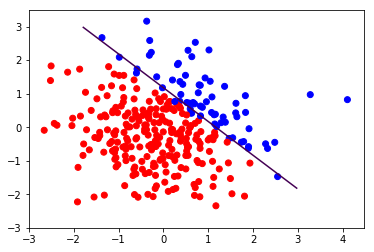

In [29]:
if __name__ == "__main__":
    backward()

### MNIST 数据集输出识别准确率

In [30]:
from tensorflow.examples.tutorials.mnist import input_data

In [31]:
mnist = input_data.read_data_sets("./data/", one_hot=True)
print('train data size:', mnist.train.num_examples)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./data/t10k-labels-idx1-ubyte.gz
train data size: 55000


In [33]:
mnist.train.labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [34]:
mnist.train.images[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [65]:
mnist.test.images.shape
# mnist.test.labels.shape

(10000, 784)

In [35]:
BATCH_SIZE = 200
xs,ys = mnist.train.next_batch(BATCH_SIZE)
print("xs shape:", xs.shape)
print("ys shape:", ys.shape)

xs shape: (200, 784)
ys shape: (200, 10)


In [36]:
import tensorflow as tf

In [44]:
INPUT_NODE = 784
OUTPUT_NODE = 10
LAYER1_NODE = 500

def get_weight(shape, regularizer):
    
    W = tf.Variable(tf.truncated_normal(shape, stddev=0.1))
    if regularizer != None:
        tf.add_to_collection("lossses", tf.contrib.layers.l2_regularizer(regularizer)(W))
    return W

def get_bias(shape):
    
    b = tf.Variable(tf.zeros(shape))
    return b

def forward(x, regularizer):
    
    W1 = get_weight([INPUT_NODE, LAYER1_NODE], regularizer)
    b1 = get_bias([LAYER1_NODE])
    y1 = tf.nn.relu(tf.matmul(x, W1) + b1)
    
    W2 = get_weight([LAYER1_NODE, OUTPUT_NODE], regularizer)
    b2 = get_bias([OUTPUT_NODE])
    y = tf.matmul(y1, W2) + b2
    return y


In [72]:
BATCH_SIZE = 200
LEARNING_RATE_BASE = 0.1
LEARNING_RATE_DECAY = 0.99
REGULARIZER = 0.0001
STEPS = 5000
MOVING_AVERAGE_DECAY = 0.99
MODEL_SAVE_PATH = "./model/"
MODEL_NAME = "mnist_model.ckpt"

import os

In [73]:
def backward(mnist):
    
    x = tf.placeholder(tf.float32, [None, INPUT_NODE])
    y_ = tf.placeholder(tf.float32, [None, OUTPUT_NODE])
    y = forward(x, REGULARIZER)
    global_step = tf.Variable(0, trainable=False)
    
    ce = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=y, labels=tf.argmax(y_, 1))
    cem = tf.reduce_mean(ce)
    loss = cem + tf.add_n(tf.get_collection("losses"))
    
    learning_rate = tf.train.exponential_decay(
                    LEARNING_RATE_BASE,
                    global_step,
                    mnist.train.num_examples / BATCH_SIZE,
                    LEARNING_RATE_DECAY,
                    staircase=True)
    train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
    
    ema = tf.train.ExponentialMovingAverage(MOVING_AVERAGE_DECAY, global_step)
    ema_op = ema.apply(tf.trainable_variables())
    with tf.control_dependencies([train_step, ema_op]):
        train_op = tf.no_op(name="train")
        
    saver = tf.train.Saver()
    
    with tf.Session() as sess:
        init_op = tf.global_variables_initializer()
        sess.run(init_op)
        
        for i in range(STEPS):
            xs,ys = mnist.train.next_batch(BATCH_SIZE)
            _, loss_value,step = sess.run([train_op, loss, global_step], feed_dict={x:xs, y_:ys})
            if i %1000 == 0:
                print("after %d training steps, loss on training batch is %g" %(step, loss_value))
                saver.save(sess, os.path.join(MODEL_SAVE_PATH, MODEL_NAME), global_step=global_step)
                
def main():
    mnist = input_data.read_data_sets("./data/", one_hot=True)
    backward(mnist)
    
if __name__=="__main__":
    main()

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
after 1 training steps, loss on training batch is 3.69723
after 1001 training steps, loss on training batch is 0.258453
after 2001 training steps, loss on training batch is 0.179892
after 3001 training steps, loss on training batch is 0.173516
after 4001 training steps, loss on training batch is 0.0657218


In [76]:
import time
TEST_INTERVAL_SECS = 5

def test(mnist):
    
    with tf.Graph().as_default() as g:
        x = tf.placeholder(tf.float32, [None, INPUT_NODE])
        y_ = tf.placeholder(tf.float32, [None, OUTPUT_NODE])
        y = forward(x, None)
        
        ema = tf.train.ExponentialMovingAverage(MOVING_AVERAGE_DECAY)
        ema_restore = ema.variables_to_restore()
        saver = tf.train.Saver(ema_restore)
        
        correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        
        while True:
            with tf.Session() as sess:
                ckpt = tf.train.get_checkpoint_state(MODEL_SAVE_PATH)
                if ckpt and ckpt.model_checkpoint_path:
                    saver.restore(sess, ckpt.model_checkpoint_path)
                    global_step = ckpt.model_checkpoint_path.split("/")[-1].split("-")[-1]
                    accuracy_score = sess.run(accuracy, feed_dict={x: mnist.test.images, y_:mnist.test.labels})
                    print("after %s training steps, test accuracy: %g" %(global_step, accuracy_score))
                else:
                    print("No checkpoint file found")

def main():
    mnist = input_data.read_data_sets("./data/", one_hot=True)
    test(mnist)
    
if __name__=="__main__":
    main()

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Restoring parameters from ./model/mnist_model.ckpt-4001


InvalidArgumentError: Assign requires shapes of both tensors to match. lhs shape= [500] rhs shape= [11]
	 [[Node: save/Assign_1 = Assign[T=DT_FLOAT, _class=["loc:@Variable_1"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/cpu:0"](Variable_1, save/RestoreV2_1)]]

Caused by op 'save/Assign_1', defined at:
  File "F:\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "F:\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "F:\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "F:\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "F:\Anaconda\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "F:\Anaconda\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "F:\Anaconda\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "F:\Anaconda\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "F:\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "F:\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "F:\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "F:\Anaconda\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "F:\Anaconda\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "F:\Anaconda\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "F:\Anaconda\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "F:\Anaconda\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "F:\Anaconda\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "F:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "F:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "F:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-76-4aef7cc40d3f>", line 34, in <module>
    main()
  File "<ipython-input-76-4aef7cc40d3f>", line 31, in main
    test(mnist)
  File "<ipython-input-76-4aef7cc40d3f>", line 13, in test
    saver = tf.train.Saver(ema_restore)
  File "F:\Anaconda\lib\site-packages\tensorflow\python\training\saver.py", line 1139, in __init__
    self.build()
  File "F:\Anaconda\lib\site-packages\tensorflow\python\training\saver.py", line 1170, in build
    restore_sequentially=self._restore_sequentially)
  File "F:\Anaconda\lib\site-packages\tensorflow\python\training\saver.py", line 691, in build
    restore_sequentially, reshape)
  File "F:\Anaconda\lib\site-packages\tensorflow\python\training\saver.py", line 419, in _AddRestoreOps
    assign_ops.append(saveable.restore(tensors, shapes))
  File "F:\Anaconda\lib\site-packages\tensorflow\python\training\saver.py", line 155, in restore
    self.op.get_shape().is_fully_defined())
  File "F:\Anaconda\lib\site-packages\tensorflow\python\ops\state_ops.py", line 271, in assign
    validate_shape=validate_shape)
  File "F:\Anaconda\lib\site-packages\tensorflow\python\ops\gen_state_ops.py", line 45, in assign
    use_locking=use_locking, name=name)
  File "F:\Anaconda\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "F:\Anaconda\lib\site-packages\tensorflow\python\framework\ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "F:\Anaconda\lib\site-packages\tensorflow\python\framework\ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Assign requires shapes of both tensors to match. lhs shape= [500] rhs shape= [11]
	 [[Node: save/Assign_1 = Assign[T=DT_FLOAT, _class=["loc:@Variable_1"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/cpu:0"](Variable_1, save/RestoreV2_1)]]


### 断点续训

In [84]:
INPUT_NODE = 784
OUTPUT_NODE = 10
LAYER1_NODE = 500

def get_weight(shape, regularizer):
    
    W = tf.Variable(tf.truncated_normal(shape, stddev=0.1))
    if regularizer != None:
        tf.add_to_collection("lossses", tf.contrib.layers.l2_regularizer(regularizer)(W))
    return W

def get_bias(shape):
    
    b = tf.Variable(tf.zeros(shape))
    return b

def forward(x, regularizer):
    
    W1 = get_weight([INPUT_NODE, LAYER1_NODE], regularizer)
    b1 = get_bias([LAYER1_NODE])
    y1 = tf.nn.relu(tf.matmul(x, W1) + b1)
    
    W2 = get_weight([LAYER1_NODE, OUTPUT_NODE], regularizer)
    b2 = get_bias([OUTPUT_NODE])
    y = tf.matmul(y1, W2) + b2
    return y


BATCH_SIZE = 200
LEARNING_RATE_BASE = 0.1
LEARNING_RATE_DECAY = 0.99
REGULARIZER = 0.0001
STEPS = 50000
MOVING_AVERAGE_DECAY = 0.99
MODEL_SAVE_PATH = "./model/"
MODEL_NAME = "mnist_model.ckpt"

import os


def backward(mnist):
    
    x = tf.placeholder(tf.float32, [None, INPUT_NODE])
    y_ = tf.placeholder(tf.float32, [None, OUTPUT_NODE])
    y = forward(x, REGULARIZER)
    global_step = tf.Variable(0, trainable=False)
    
    ce = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=y, labels=tf.argmax(y_, 1))
    cem = tf.reduce_mean(ce)
    loss = cem + tf.add_n(tf.get_collection("losses"))
    
    learning_rate = tf.train.exponential_decay(
                    LEARNING_RATE_BASE,
                    global_step,
                    mnist.train.num_examples / BATCH_SIZE,
                    LEARNING_RATE_DECAY,
                    staircase=True)
    train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
    
    ema = tf.train.ExponentialMovingAverage(MOVING_AVERAGE_DECAY, global_step)
    ema_op = ema.apply(tf.trainable_variables())
    with tf.control_dependencies([train_step, ema_op]):
        train_op = tf.no_op(name="train")
        
    saver = tf.train.Saver()
    
    with tf.Session() as sess:
        init_op = tf.global_variables_initializer()
        sess.run(init_op)
        
        
        ckpt = tf.train.get_checkpoint_state(MODEL_SAVE_PATH)
        if ckpt and ckpt.model_checkpoints_path:
            saver.restore(sess, ckpt.model_checkpoints_path)
            
            
        for i in range(STEPS):
            xs,ys = mnist.train.next_batch(BATCH_SIZE)
            _, loss_value,step = sess.run([train_op, loss, global_step], feed_dict={x:xs, y_:ys})
            if i %1000 == 0:
                print("after %d training steps, loss on training batch is %g" %(step, loss_value))
                saver.save(sess, os.path.join(MODEL_SAVE_PATH, MODEL_NAME), global_step=global_step)
                
def main():
    mnist = input_data.read_data_sets("./data/", one_hot=True)
    backward(mnist)
    
if __name__=="__main__":
    main()

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz


AttributeError: 'CheckpointState' object has no attribute 'model_checkpoints_path'

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data

In [ ]:
def restore_model(testPicArr):
    
    with tf.Graph().as_default() as tg:
        x = tf.placeholder(tf.float32, [None, INPUT_NODE])
        y = forward(x, None)
        preValue = tf.argmax(y, 1)
        
        
        variable_averages = tf.train.ExponentialMovingAverage(MOVING_AVERAGE_DECAY)
        variable_to_restore = variable_averages.variable_to_restore()
        saver = tf.train.Saver(variable_to_restore)
        
        with tf.Session() as sess:
            ckpt = tf.train.get_checkpoint_state(MODEL_SAVE_PATH)
            if ckpt and ckpt.model_checkpoint_path:
                saver.restore(sess, ckpt.model_checkpoint_path)
                
                preValue = sess.run(preValue, feed_dict={x:testPicArr})
                return preValue
            else:
                print("No checkpoints file found")
                return -1
            
def pre_pic(picName):
    
    img = Image.open(picName)
    reIm = img.resize((28,28), Image.ANTIALIAS)
    im_arr = np.array(reIm.convert("L"))
    threshold = 50
    for i in range(28):
        for j in range(28):
            im_arr[i][j] = 255 - im_arr[i][j]
            if (im_arr[i][j] < threshold):
                im_arr[i][j] = 0
            else:
                im_arr[i][j] = 255
    nm_arr = im_arr.reshape([1, 784])
    nm_arr = nm_arr.astype(np.float32)
    img_ready = np.multiply(nm_arr, 1.0/255.0)
    
    return img_ready

def application():
    testNum = input('input the number of test pictures:')
    for i in range(int(testNum)):
        testPic = input()
        testPicArr = pre_pic(testPic)
        preValue = restore_model(testPicArr)
        print("The prediction number is:", preValue)
        
def main():
    application()
    
if __name__=="__main__":
    main()

input the number of test pictures:10


In [ ]:
im

In [ ]:
def generate_tfRecord():
    isExists = os.path.exists(data_path)
    if not isExists:
        os.makedirs(data_path)
        print